# 1. Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [17]:
df = pd.read_csv("COVID clinical trials.csv")
print(df.shape)
df.head()

(5783, 27)


,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


# 3. Explore Dataset

In [18]:
# Info about columns and types
df.info()

# Summary statistics
df.describe(include="all").T

# Missing values
df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5783 entries, 0 to 5782
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     5783 non-null   int64  
 1   NCT Number               5783 non-null   object 
 2   Title                    5783 non-null   object 
 3   Acronym                  2480 non-null   object 
 4   Status                   5783 non-null   object 
 5   Study Results            5783 non-null   object 
 6   Conditions               5783 non-null   object 
 7   Interventions            4897 non-null   object 
 8   Outcome Measures         5748 non-null   object 
 9   Sponsor/Collaborators    5783 non-null   object 
 10  Gender                   5773 non-null   object 
 11  Age                      5783 non-null   object 
 12  Phases                   3322 non-null   object 
 13  Enrollment               5749 non-null   float64
 14  Funded Bys              

Results First Posted       5747
Study Documents            5601
Acronym                    3303
Phases                     2461
Interventions               886
Locations                   585
Completion Date              36
Primary Completion Date      36
Study Designs                35
Outcome Measures             35
Enrollment                   34
Start Date                   34
Gender                       10
Other IDs                     1
Last Update Posted            0
First Posted                  0
Rank                          0
Study Type                    0
Funded Bys                    0
NCT Number                    0
Age                           0
Sponsor/Collaborators         0
Conditions                    0
Study Results                 0
Status                        0
Title                         0
URL                           0
dtype: int64

# 4. Data Cleaning

In [19]:
# Drop very high-missing columns
df.drop(["Results First Posted", "Study Documents"], axis=1, inplace=True)

# Fill misssing categorical columns wiht "Missing <col>"
categorical_features = df.select_dtypes(include="object").columns
for col in categorical_features:
    df[col] = df[col].fillna(f"Missing {col}")

# Handle Enrollment (numeric) → impute median
df["Enrollment"] = df["Enrollment"].fillna(df["Enrollment"].median())


# 5. Feature Engineering

In [20]:
# Convert dates
date_cols = ["Start Date", "Primary Completion Date", "Completion Date"]
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors="coerce")

# Extract Country from Locations 
df["Country"] = df["Locations"].apply(lambda x: str(x).split(",")[-1] if pd.notnull(x) else "Unknown")

# 6. Univariate Analysis

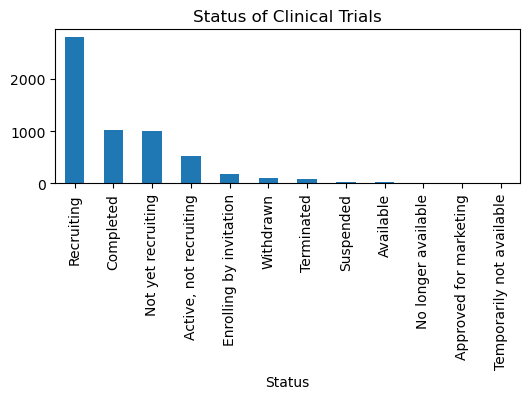

In [28]:
# Status distribution
df["Status"].value_counts().plot(kind="bar", figsize=(6,2), title="Status of Clinical Trials")
plt.show()

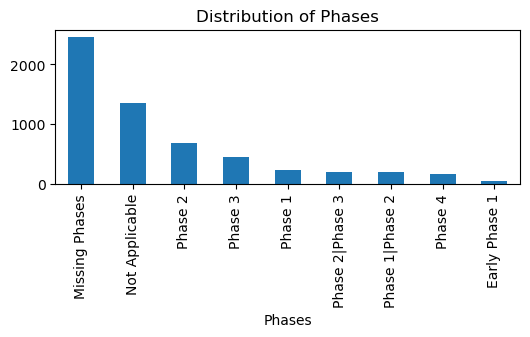

In [27]:
# Phase distribution
df["Phases"].value_counts().plot(kind="bar", figsize=(6,2), title="Distribution of Phases")
plt.show()

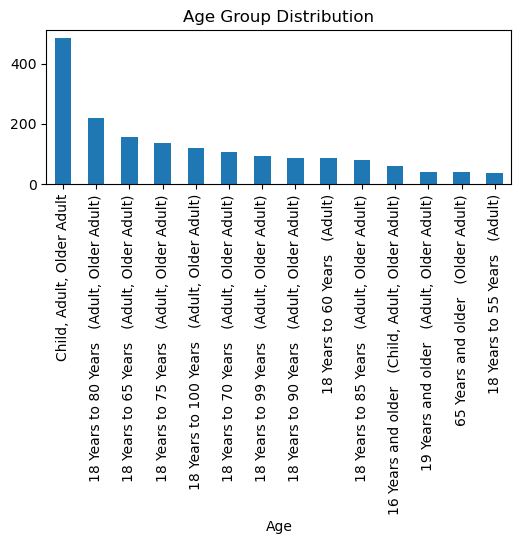

In [41]:
# Age distribution of 15 Persons
df["Age"].value_counts()[1:15].plot(kind="bar", figsize=(6,2), title="Age Group Distribution")
plt.show()

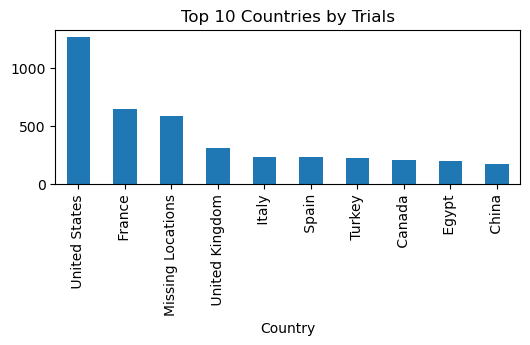

In [35]:
# Top 10 countries
df["Country"].value_counts()[:10].plot(kind="bar", figsize=(6,2), title="Top 10 Countries by Trials")
plt.show()

# 7. Bivariate Analysis

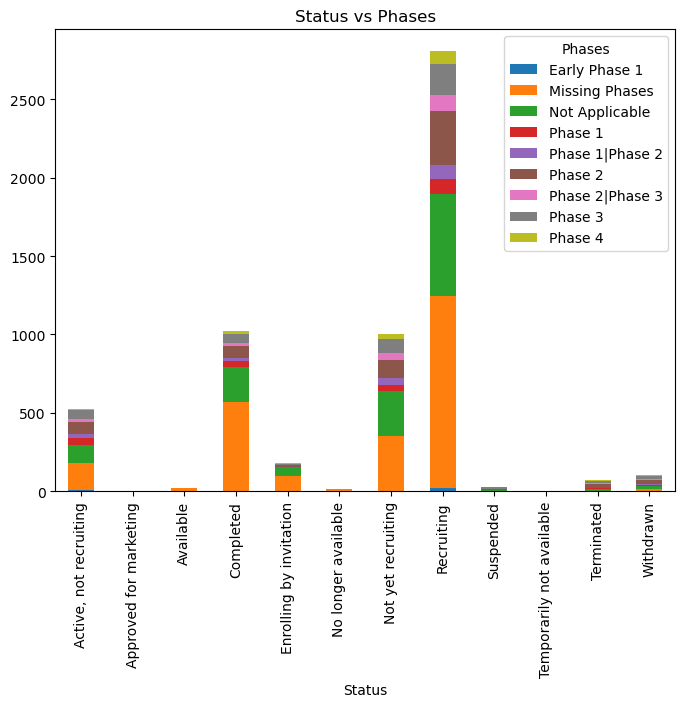

In [43]:
# Status vs Phases
status_phase = pd.crosstab(df["Status"], df["Phases"])
status_phase.plot(kind="bar", stacked=True, figsize=(8,6), title="Status vs Phases")
plt.show()


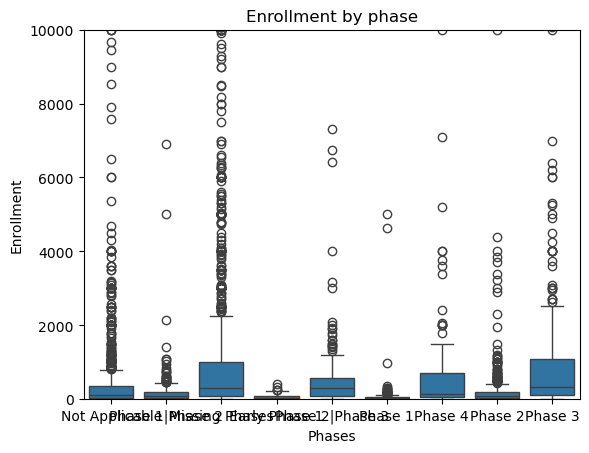

In [52]:
# Enrollment distribution by Phase
sns.boxplot(x="Phases", y="Enrollment", data=df)
plt.title("Enrollment by phase")
plt.ylim(0, 10000)  # Limit scale for better visibility
plt.show()

# 8. Time Series Analysis

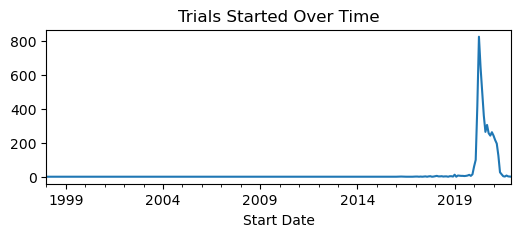

In [53]:
# Trials started over time (monthly)
trials_over_time = df["Start Date"].dt.to_period("M").value_counts().sort_index()
trials_over_time.plot(kind="line", figsize=(6,2), title="Trials Started Over Time")
plt.show()
